# Analysis

In [135]:
import mysql.connector as connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

#### Connect Database

In [136]:
conn = connector.connect(
    host="localhost",
    user="root",
    password="gehad_db28",
    database="gp_questionnaire"
)

cursor = conn.cursor()

In [137]:
cursor.execute("SELECT reha_FA, reha_RW, reha_AE, reha_PU FROM uesscores")
reha_items = cursor.fetchall()

rehaFA, rehaRW, rehaAE, rehaPU = [], [], [], []
for row in reha_items:
    rehaFA.append(row[0])
    rehaRW.append(row[1])
    rehaAE.append(row[2])
    rehaPU.append(row[3])

print(rehaFA)
print(rehaRW)
print(rehaAE)
print(rehaPU)

[4.571428571428571, 3.857142857142857, 2.142857142857143, 2.5714285714285716, 3.142857142857143, 1.7142857142857142, 4.0, 3.2857142857142856, 2.7142857142857144, 2.7142857142857144, 3.0, 4.285714285714286, 3.7142857142857144, 4.142857142857143, 3.2857142857142856, 1.5714285714285714, 3.4285714285714284, 3.0, 2.4285714285714284]
[4.7, 3.9, 3.2, 3.3, 3.8, 1.8, 3.9, 4.5, 3.7, 2.7, 2.8, 4.4, 3.9, 4.1, 4.2, 1.5, 4.1, 4.1, 3.3]
[5.0, 4.0, 3.75, 4.75, 4.0, 1.5, 4.25, 4.75, 3.75, 3.25, 2.0, 4.5, 3.25, 3.75, 4.5, 1.75, 4.25, 4.0, 3.25]
[4.285714285714286, 4.0, 3.7142857142857144, 2.2857142857142856, 3.857142857142857, 3.5714285714285716, 4.571428571428571, 3.2857142857142856, 3.5714285714285716, 3.2857142857142856, 3.0, 3.5714285714285716, 4.285714285714286, 4.428571428571429, 4.285714285714286, 2.857142857142857, 3.2857142857142856, 4.0, 4.285714285714286]


In [138]:
min_rehaFA = np.min(rehaFA)
max_rehaFA = np.max(rehaFA)

min_rehaRW = np.min(rehaRW)
max_rehaRW = np.max(rehaRW)

min_rehaAE = np.min(rehaAE)
max_rehaAE = np.max(rehaAE)

min_rehaPU = np.min(rehaPU)
max_rehaPU = np.max(rehaPU)

print(min_rehaFA)
print(max_rehaFA)

print(min_rehaRW)
print(max_rehaRW)

print(min_rehaAE)
print(max_rehaAE)

print(min_rehaPU)
print(max_rehaPU)

1.5714285714285714
4.571428571428571
1.5
4.7
1.5
5.0
2.2857142857142856
4.571428571428571


In [139]:
cursor.execute("SELECT VR_FA , VR_RW, VR_AE, VR_PU FROM uesscores")
vr_items = cursor.fetchall()

vrFA, vrRW, vrAE, vrPU = [], [], [], []
for row in vr_items:
    vrFA.append(row[0])
    vrRW.append(row[1])
    vrAE.append(row[2])
    vrPU.append(row[3])

print(vrFA)
print(vrRW)
print(vrAE)
print(vrPU)

[5.0, 4.428571428571429, 3.857142857142857, 4.857142857142857, 4.857142857142857, 5.0, 4.0, 4.285714285714286, 3.5714285714285716, 4.285714285714286, 4.285714285714286, 5.0, 4.714285714285714, 5.0, 4.0, 3.5714285714285716, 4.857142857142857, 3.7142857142857144, 4.428571428571429]
[5.0, 4.4, 4.5, 4.3, 4.6, 5.0, 4.3, 4.9, 3.9, 4.5, 4.1, 4.9, 4.9, 4.8, 4.4, 2.9, 4.3, 5.0, 4.3]
[5.0, 4.5, 4.25, 5.0, 4.5, 4.25, 4.0, 4.75, 4.25, 4.25, 3.75, 5.0, 5.0, 4.75, 4.5, 2.5, 4.5, 4.75, 4.75]
[4.571428571428571, 3.857142857142857, 4.142857142857143, 3.5714285714285716, 4.571428571428571, 4.142857142857143, 3.7142857142857144, 3.0, 4.142857142857143, 4.285714285714286, 3.4285714285714284, 4.857142857142857, 3.7142857142857144, 4.428571428571429, 3.7142857142857144, 2.7142857142857144, 3.0, 4.428571428571429, 4.142857142857143]


In [140]:
min_vrFA = np.min(vrFA)
max_vrFA = np.max(vrFA)

min_vrRW = np.min(vrRW)
max_vrRW = np.max(vrRW)

min_vrAE = np.min(vrAE)
max_vrAE = np.max(vrAE)

min_vrPU = np.min(vrPU)
max_vrPU = np.max(vrPU)

print(min_vrFA)
print(max_vrFA)

print(min_vrRW)
print(max_vrRW)

print(min_vrAE)
print(max_vrAE)

print(min_vrPU)
print(max_vrPU)

3.5714285714285716
5.0
2.9
5.0
2.5
5.0
2.7142857142857144
4.857142857142857


In [141]:
rehaFA_mean = sum(rehaFA) / len(rehaFA)
rehaRW_mean = sum(rehaRW) / len(rehaRW)
rehaAE_mean = sum(rehaAE) / len(rehaAE)
rehaPU_mean = sum(rehaPU) / len(rehaPU)

reha_items = [rehaFA_mean, rehaRW_mean, rehaAE_mean, rehaPU_mean]

vrFA_mean = sum(vrFA) / len(vrFA)
vrRW_mean = sum(vrRW) / len(vrRW)
vrAE_mean = sum(vrAE) / len(vrAE)
vrPU_mean = sum(vrPU) / len(vrPU)

vr_items = [vrFA_mean, vrRW_mean, vrAE_mean, vrPU_mean]

In [142]:
reha_items

[3.1353383458646618, 3.573684210526316, 3.6973684210526314, 3.7067669172932334]

In [143]:
vr_items

[4.406015037593985, 4.473684210526316, 4.434210526315789, 3.917293233082707]

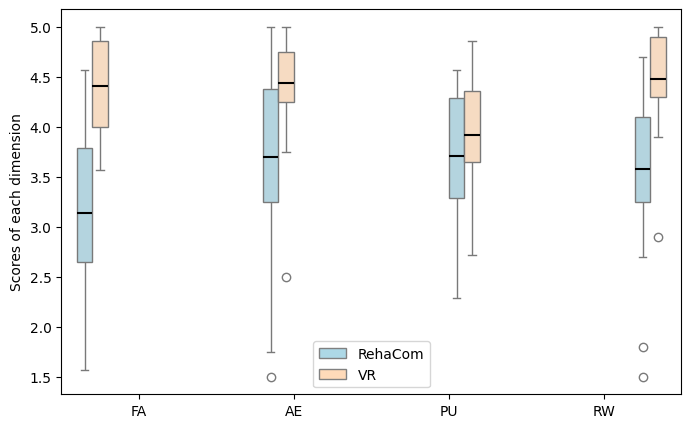

In [159]:
df = pd.DataFrame({
    'value': np.concatenate([rehaFA, vrFA, rehaAE, vrAE, rehaPU, vrPU, rehaRW, vrRW]),
    'boxplot': ['rehaFA']*len(rehaFA) + ['vrFA']*len(vrFA) + ['rehaAE']*len(rehaAE) + ['vrAE']*len(vrAE) + ['rehaPU']*len(rehaPU) + ['vrPU']*len(vrPU) + ['rehaRW']*len(rehaRW) + ['vrRW']*len(vrRW),
    'group': np.repeat(['FA', 'AE', 'PU', 'RW'], 2*len(rehaFA))
})

palette = {
    'rehaFA': 'lightblue', 'rehaRW': 'lightblue', 'rehaAE': 'lightblue', 'rehaPU': 'lightblue',
    'vrFA': 'peachpuff', 'vrRW': 'peachpuff', 'vrAE': 'peachpuff', 'vrPU': 'peachpuff'
}

plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='group', y='value', hue='boxplot', data=df, palette=palette, legend=False, 
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

handles = [
    Patch(facecolor='lightblue', edgecolor='grey', label='RehaCom'),
    Patch(facecolor='peachpuff', edgecolor='grey', label='VR')
]
ax.legend(handles=handles, loc='lower center')

plt.xlabel('')
plt.ylabel('Scores of each dimension')

plt.show()

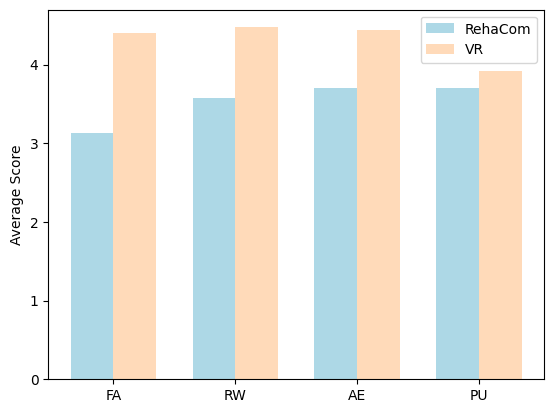

In [145]:
bar_width = 0.35
plt.bar(np.arange(4) - bar_width/2, [rehaFA_mean, rehaRW_mean, rehaAE_mean, rehaPU_mean], bar_width, label='RehaCom', color='lightblue')
plt.bar(np.arange(4) + bar_width/2, [vrFA_mean, vrRW_mean, vrAE_mean, vrPU_mean], bar_width, label='VR', color='peachpuff')

plt.xticks(np.arange(4), ['FA', 'RW', 'AE', 'PU'])
plt.ylabel('Average Score')
plt.legend()

plt.show()

In [146]:
rehaFA_std = np.std(rehaFA)
rehaRW_std = np.std(rehaRW)
rehaAE_std = np.std(rehaAE)
rehaPU_std = np.std(rehaPU)

vrFA_std = np.std(vrFA)
vrRW_std = np.std(vrRW)
vrAE_std = np.std(vrAE)
vrPU_std = np.std(vrPU)

print('rehaFA: ', rehaFA_std, ' vrFA: ', vrFA_std)
print('rehaRW: ', rehaRW_std, ' vrRW: ', vrRW_std)
print('rehaAE: ', rehaAE_std, ' vrAE: ', vrAE_std)
print('rehaPU: ', rehaPU_std, ' vrPU: ', vrPU_std)


rehaFA:  0.8206173623844965  vrFA:  0.4954425115649795
rehaRW:  0.8434528690936272  vrRW:  0.49080182007893763
rehaAE:  0.9786502095677395  vrAE:  0.5726330301839195
rehaPU:  0.5907880084379907  vrPU:  0.572021852680007


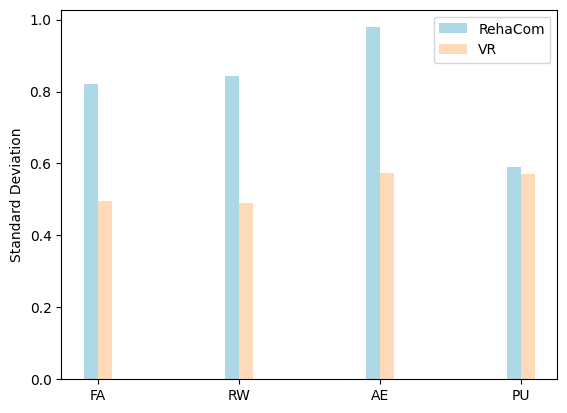

In [147]:
bar_width = 0.1
plt.bar(np.arange(4) - bar_width/2, [rehaFA_std, rehaRW_std, rehaAE_std, rehaPU_std], bar_width, label='RehaCom', color='lightblue')
plt.bar(np.arange(4) + bar_width/2, [vrFA_std, vrRW_std, vrAE_std, vrPU_std], bar_width, label='VR', color='peachpuff')

plt.xticks(np.arange(4), ['FA', 'RW', 'AE', 'PU'])
plt.ylabel('Standard Deviation')
plt.legend()

plt.show()

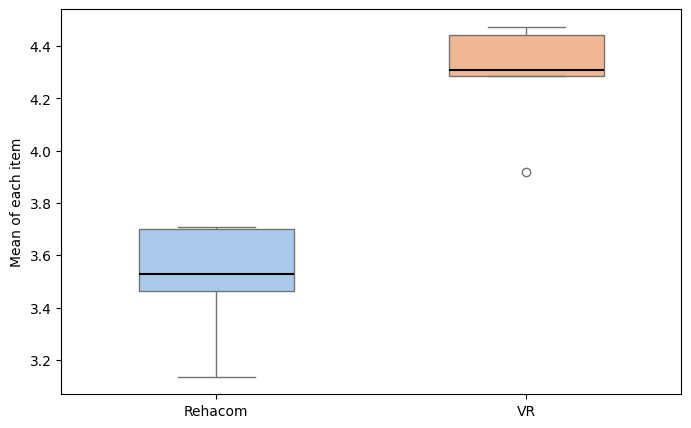

In [148]:
df = pd.DataFrame({
    'value': np.concatenate([reha_items, vr_items]),
    'group': np.repeat(['Rehacom', 'VR'], 4)
})

plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='value', data=df, width=0.5, palette='pastel', hue='group', legend=False, 
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

plt.xlabel('')
plt.ylabel('Mean of each item')

plt.show()

In [149]:
cursor.execute("SELECT reha_total FROM uesscores")
reha_total = cursor.fetchall()

reha_total = [item[0] for item in reha_total]
reha_total = [i / 4 for i in reha_total]
print(reha_total)

reha_mean = sum(reha_total) / len(reha_total)
reha_mean

[4.639285714285714, 3.939285714285714, 3.2017857142857142, 3.2267857142857146, 3.7, 2.1464285714285714, 4.180357142857143, 3.9553571428571423, 3.4339285714285714, 2.9875, 2.7, 4.189285714285715, 3.7874999999999996, 4.105357142857143, 4.067857142857143, 1.9196428571428572, 3.7660714285714283, 3.775, 3.316071428571428]


3.528289473684211

In [150]:
cursor.execute("SELECT VR_total FROM uesscores")
VR_total = cursor.fetchall()

VR_total = [item[0] for item in VR_total]
VR_total = [i / 4 for i in VR_total]
print(VR_total)

vr_mean = sum(VR_total) / len(VR_total)
vr_mean

[4.892857142857142, 4.296428571428572, 4.1875, 4.432142857142857, 4.632142857142856, 4.598214285714286, 4.003571428571429, 4.233928571428572, 3.9660714285714285, 4.330357142857142, 3.8910714285714287, 4.939285714285714, 4.582142857142857, 4.744642857142857, 4.1535714285714285, 2.9214285714285717, 4.164285714285715, 4.4732142857142865, 4.4053571428571425]


4.307800751879699

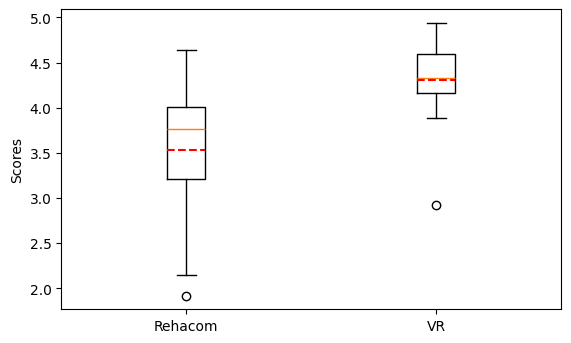

In [151]:
fig = plt.figure(figsize=(5, 3))

data = [reha_total, VR_total]

ax = fig.add_axes([0, 0, 1 ,1])
bp = ax.boxplot(data, showmeans=True, meanline=True, meanprops={'color': 'red', 'linewidth': '1.5'})

# plt.text(1, reha_mean, f'{reha_mean:.2f}', fontsize=10, ha='left', va='bottom', color='g')
# plt.text(2, vr_mean, f'{vr_mean:.2f}', fontsize=10, ha='left', va='bottom', color='g')

plt.xticks([1, 2], ['Rehacom', 'VR'])
plt.ylabel('Scores')

plt.show()

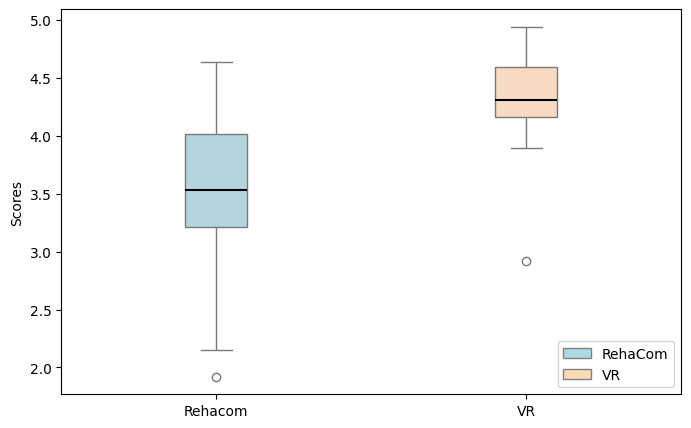

In [152]:
df = pd.DataFrame({
    'value': np.concatenate([reha_total, VR_total]),
    'group': np.repeat(['Rehacom', 'VR'], len(reha_total))
})

palette = {
    'VR': 'peachpuff',
    'Rehacom': 'lightblue'
}

plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='group', y='value', hue='group', data=df, width=0.2, palette=palette, 
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

handles = [
    Patch(facecolor='lightblue', edgecolor='grey', label='RehaCom'),
    Patch(facecolor='peachpuff', edgecolor='grey', label='VR')
]
ax.legend(handles=handles, loc='lower right')

plt.xlabel('')
plt.ylabel('Scores')

plt.show()

In [153]:
print(np.min(reha_total))
print(np.max(reha_total))

print(np.min(VR_total))
print(np.max(VR_total))

1.9196428571428572
4.639285714285714
2.9214285714285717
4.939285714285714


In [154]:
print(np.std(reha_total))
print(np.std(VR_total))

0.6887516102326816
0.43643368232178814


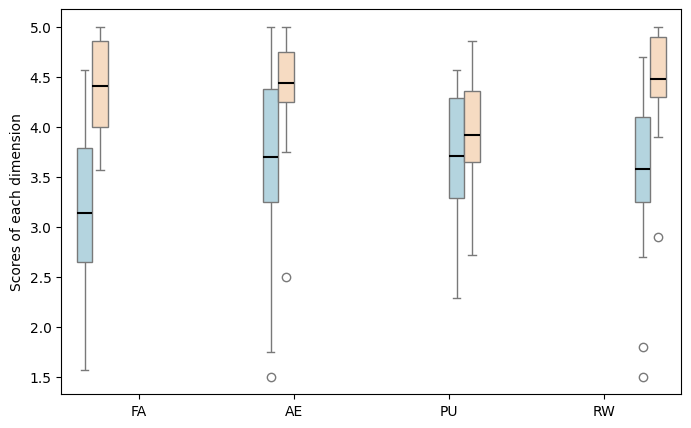

In [155]:
df = pd.DataFrame({
    'value': np.concatenate([rehaFA, vrFA, rehaAE, vrAE, rehaPU, vrPU, rehaRW, vrRW]),
    'boxplot': ['rehaFA']*len(rehaFA) + ['vrFA']*len(vrFA) + ['rehaAE']*len(rehaAE) + ['vrAE']*len(vrAE) + ['rehaPU']*len(rehaPU) + ['vrPU']*len(vrPU) + ['rehaRW']*len(rehaRW) + ['vrRW']*len(vrRW),
    'group': np.repeat(['FA', 'AE', 'PU', 'RW'], 2*len(rehaFA))
})

palette = {
    'rehaFA': 'lightblue', 'rehaRW': 'lightblue', 'rehaAE': 'lightblue', 'rehaPU': 'lightblue',
    'vrFA': 'peachpuff', 'vrRW': 'peachpuff', 'vrAE': 'peachpuff', 'vrPU': 'peachpuff'
}

plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='group', y='value', hue='boxplot',data=df, palette=palette, 
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

plt.xlabel('')
ax.legend_.remove()  
plt.ylabel('Scores of each dimension')

plt.show()